# Simple Regression - iid measurements and Scaler Variables

In [301]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler

#### Data Generating - Data loading 

In [327]:
np.random.seed(2)
N = 1000
X = np.random.randn(N, 1)
y = 1 + 2*X + 5*np.random.randn(N, 1)

#### Plot the Data

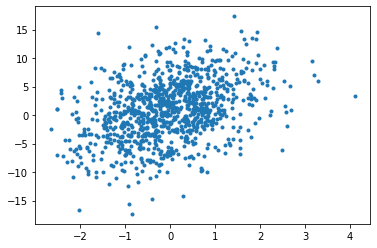

In [328]:
plt.plot(X, y, '.')
plt.show()

#### Data Preparing 

In [329]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
one_train = np.ones((len(X_train), 1))
X_train = np.hstack((one_train, X_train))

#### Parameters Estimation using LS method 

In [330]:
den = 0
num = np.zeros((1, 2))
for i in range(len(X_train)):
    num += X_train[i]*y_train[i]
    den += X_train[i]**2
W = num/den
W

array([[0.8336608 , 1.86939007]])

#### Evaluate the Model 

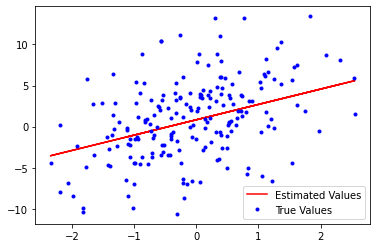

In [331]:
y_pre = W[0][0] + W[0][1]*X_test

plt.plot(X_test, y_pre, 'r')
plt.plot(X_test, y_test, 'b.')
plt.legend(['Estimated Values', 'True Values'])
plt.show()

#### Evaluation of Error

-0.07591338387451743
0.09595988219110407


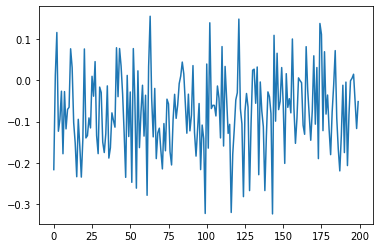

In [321]:
error = y_pre - y_test
print(np.mean(error))
print(np.std(error))
plt.plot(error)
plt.show()

# Simple Regression with iid Measurements - Multivariate Case

#### Data Generating 

In [354]:
np.random.seed(2)
N = 1000
X1 = np.random.randn(N, 1)
X2 = 2 + np.random.randn(N, 1)
X3 = 2*np.random.randn(N, 1)
X4 = 2 + 2*np.random.randn(N, 1)
y = 0.5 - 3*X1 + 4*X2 + 3*X3 - 0.05*X4 + 5*np.random.randn(N, 1)

#### Plot the Data 

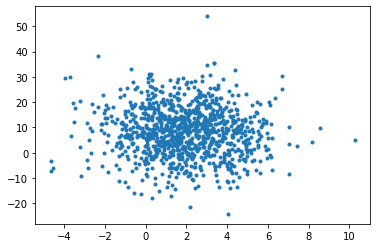

In [355]:
plt.plot(X4, y, '.')
plt.show()

#### Data Preparing 

In [356]:
one = np.ones((N, 1))
X = np.hstack((one, X1, X2, X3, X4))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X.shape)

(1000, 5)


In [357]:
X_T_X_train = np.matmul(X_train.T, X_train)
X_T_Y_train = np.matmul(X_train.T, y_train)
W = np.matmul(np.linalg.inv(X_T_X_train), X_T_Y_train)
W

array([[ 0.31950655],
       [-3.26371873],
       [ 4.09455808],
       [ 3.07124004],
       [-0.1334039 ]])

#### Evaluate the Model  

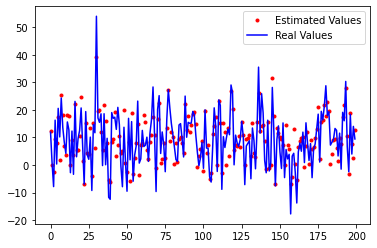

In [358]:
y_pre = np.matmul(X_test, W)
plt.plot(y_pre, 'r.')
plt.plot(y_test, 'b-')
plt.legend(['Estimated Values', 'Real Values'])
plt.show()

#### Evaluation of the Error 

0.06471620642392117
5.357363813785375


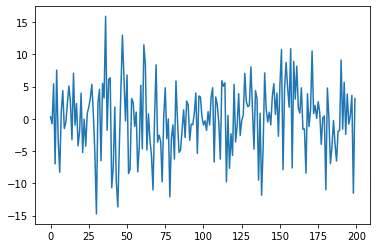

In [359]:
Error = y_pre - y_test
print(np.mean(Error))
print(np.std(Error))
plt.plot(Error)
plt.show()

# Simple Regression with non - iid Measurements 

#### Data Generating 

In [372]:
np.random.seed(2)
N = 1000
X1 = np.random.randn(N, 1)
X2 = 2 + np.random.randn(N, 1)
X3 = 2*np.random.randn(N, 1)
X4 = 2 + 2*np.random.randn(N, 1)
y = np.empty((N, 1))
for k in range(N):
    sigma = np.random.randint(3)
    if sigma == 0:
        sigma = 1
    y[k] = 0.5 - 3*X1[k] + 4*X2[k] + 3*X3[k] - 0.05*X4[k] + sigma*np.random.randn(1, 1)

#### Plot the Data 

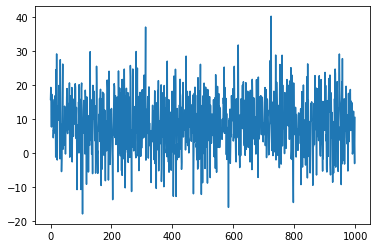

In [373]:
plt.plot(y)
plt.show()

#### Data Preparing

In [374]:
one = np.ones((N, 1))
X = np.hstack((one, X1, X2, X3, X4))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X.shape)

(1000, 5)


#### How to Weight the Measurements?
1 - Consider the convariance matrix of noide as the weight matrix, if available!

2 - Do some LS estimation and consider the variance of noise as the weight matrix

3 - Calculate the distance between data points and the mean of data 

In [375]:
distance = np.exp(np.abs((X_train - np.mean(X_train))))
mean = np.mean(distance, axis=1).reshape(-1, 1)
weights = np.diagflat(np.matrix(mean))
X_T_Q_train = np.matmul(X_train.T, np.linalg.inv(weights))
X_T_Q_train.shape
X_T_Q_X_train = np.matmul(X_T_Q_train, X_train)
X_T_Q_Y_train = np.matmul(X_T_Q_train, y_train)
W = np.matmul(np.linalg.inv(X_T_Q_X_train), X_T_Q_Y_train)
W

matrix([[ 0.2059743 ],
        [-3.0214161 ],
        [ 4.10084138],
        [ 3.00623739],
        [ 0.01237876]])

#### Evaluation the Model 

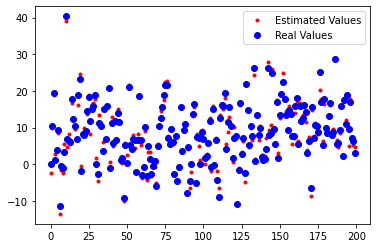

In [376]:
y_pre = np.matmul(X_test, W)
plt.plot(y_pre, 'r.')
plt.plot(y_test, 'bo')
plt.legend(['Estimated Values', 'Real Values'])
plt.show()

#### Error Evaluation 

-0.05844572631822275
1.2899906750162877


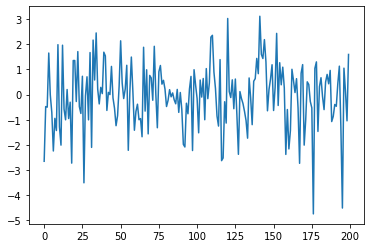

In [377]:
Error = y_pre - y_test
print(np.mean(Error))
print(np.std(Error))
plt.plot(Error)
plt.show()